# This is a Nudity-Detection-Model (Not safe for work (NSFW))


The main idea behind this project is to detect Nudity on live video stream. This is just a sample framework created for testing purpose and can be extended for live projects as well

Due to time limitation, i am just using image for verification and not the actual video

Using a pretrained model shared by "Gant Laborde" over GITHUB.

Model is trained using mobilenetv2

In [1]:
import json
from os import listdir
from os.path import isfile, join, exists, isdir, abspath

import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

IMAGE_DIM = 224   # required/default image dimensionality

def load_images(image_paths, image_size, verbose=True):
    '''
    Function for loading images into numpy arrays for passing to model.predict
    inputs:
        image_paths: list of image paths to load
        image_size: size into which images should be resized
        verbose: show all of the image path and sizes loaded
    
    outputs:
        loaded_images: loaded images on which keras model can run predictions
        loaded_image_indexes: paths of images which the function is able to process
    
    '''
    loaded_images = []
    loaded_image_paths = []

    if isdir(image_paths):
        parent = abspath(image_paths)
        image_paths = [join(parent, f) for f in listdir(image_paths) if isfile(join(parent, f))]
    elif isfile(image_paths):
        image_paths = [image_paths]

    for img_path in image_paths:
        try:
            if verbose:
                print(img_path, "size:", image_size)
            image = keras.preprocessing.image.load_img(img_path, target_size=image_size)
            image = keras.preprocessing.image.img_to_array(image)
            image /= 255
            loaded_images.append(image)
            loaded_image_paths.append(img_path)
        except Exception as ex:
            print("Image Load Failure: ", img_path, ex)
    
    return np.asarray(loaded_images), loaded_image_paths


def load_model(model_path):
    if model_path is None or not exists(model_path):
    	raise ValueError("saved_model_path must be the valid directory of a saved model to load.")
    
    # model = tf.keras.models.load_model(model_path)
    model = tf.keras.models.load_model(model_path, custom_objects={'KerasLayer':hub.KerasLayer})
    # model.summary()
    print(model.summary())
    return model


def classify(model, input_paths, image_dim=IMAGE_DIM):
    """ Classify given a model, input paths (could be single string), and image dimensionality...."""
    images, image_paths = load_images(input_paths, (image_dim, image_dim))
    probs = classify_nd(model, images)
    return dict(zip(image_paths, probs))


def classify_nd(model, nd_images):
    """ Classify given a model, image array (numpy)...."""

    model_preds = model.predict(nd_images)
    # preds = np.argsort(model_preds, axis = 1).tolist()
    
    categories = ['drawings', 'hentai', 'neutral', 'porn', 'sexy']

    probs = []
    for i, single_preds in enumerate(model_preds):
        single_probs = {}
        for j, pred in enumerate(single_preds):
            single_probs[categories[j]] = float(pred)
        probs.append(single_probs)
    return probs


def main():   

    img_path="ojja.jpeg"
    model = load_model("Nudity-Detection-Model.h5")
    image_preds = classify(model, img_path, IMAGE_DIM)
    print(json.dumps(image_preds, indent=2), '\n')


if __name__ == "__main__":
	main()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              6158505   
                                                                 
 dropout (Dropout)           (None, 1001)              0         
                                                                 
 dense (Dense)               (None, 5)                 5010      
                                                                 
 prediction (Activation)     (None, 5)                 0         
                                                                 
Total params: 6163515 (23.51 MB)
Trainable params: 6115579 (23.33 MB)
Non-trainable params: 47936 (187.25 KB)
_________________________________________________________________
None
ojja.jpeg size: (224, 224)
1/1 [==============================] - 1s 655ms/step
{
  "ojja.jpeg": {
    "drawings": 0.103571318089962,
    "

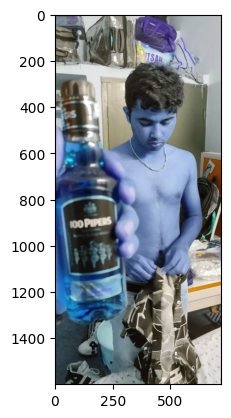

In [2]:
import cv2
import matplotlib.pyplot as plt
img=cv2.imread("ojja.jpeg")
plt.imshow(img)
plt.show()

{
  "Swimmer1.jpg": {
    "drawings": 0.04502937197685242,
    "hentai": 0.023115945979952812,
    "neutral": 0.06405390053987503,
    "porn": 0.02327408827841282,
    "sexy": 0.8445267081260681
  }
} 

# As you can see, above image was classified as Sexy.

In [12]:
import json
from os import listdir
from os.path import isfile, join, exists, isdir, abspath

import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub

In [19]:
from os.path import exists, isfile

In [23]:
pip install pdf2image

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
!apt-get install poppler-utils

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [25]:
!apt-get install poppler-utils

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [58]:
from pdf2image import convert_from_path

# Specify the path to the Poppler utilities
poppler_path = '/usr/bin/pdftoppm'  # The path may vary, check where it's installed in Colab

# Convert PDF to images using the specified Poppler path
images = convert_from_path('your_pdf.pdf', poppler_path=poppler_path)


PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?

In [28]:
from pdf2image import convert_from_path

# Specify the path to the Poppler utilities (change this to your actual path)
poppler_path = r'C:\path\to\poppler-21.03.0\Library\bin'

# Convert PDF to images using the specified Poppler path
images = convert_from_path('onepiece.pdf', poppler_path=poppler_path)


PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?

In [61]:
pip install python-poppler

     ---------------------------------------- 0.0/138.5 kB ? eta -:--:--
     -------- ------------------------------ 30.7/138.5 kB 1.4 MB/s eta 0:00:01
     --------------------- --------------- 81.9/138.5 kB 919.0 kB/s eta 0:00:01
     ----------------------------- ------ 112.6/138.5 kB 819.2 kB/s eta 0:00:01
     ----------------------------- ------ 112.6/138.5 kB 819.2 kB/s eta 0:00:01
     ------------------------------------ 138.5/138.5 kB 588.5 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      + meson setup C:\Users\HP\AppData\Local\Temp\pip-install-d2okyc8v\python-poppler_a330bb3a29a345459b8bebb9eaf5d205 C:\Users\HP\AppData\Local\Temp\pip-install-d2okyc8v\python-poppler_a330bb3a29a345459b8bebb9eaf5d205\.mesonpy-_1mml62z -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\HP\AppData\Local\Temp\pip-install-d2okyc8v\python-poppler_a330bb3a29a345459b8bebb9eaf5d205\.mesonpy-_1mml62z\meson-python-native-file.ini
      The Meson build system
      Version: 1.2.3
      Source dir: C:\Users\HP\AppData\Local\Temp\pip-install-d2okyc8v\python-poppler_a330bb3a29a345459b8bebb9eaf5d205
      Build dir: C:\Users\HP\AppData\Local\Temp\pip-install-d2okyc8v\python-poppler_a330bb3a29a345459b8bebb9eaf5d205\.mesonpy-_1mml62z
      Build type: native build
      Project name: python-poppler
      Project version: 0.4

In [60]:
from poppler import load_from_file, PageRenderer

pdf_document = load_from_file("onepiece.pdf")
page_1 = pdf_document.create_page(0)
page_1_text = page_1.text()

renderer = PageRenderer()
image = renderer.render_page(page_1)
image_data = image.data

ImportError: cannot import name 'load_from_file' from 'poppler' (c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\poppler\__init__.py)

In [37]:
import requests
from pdf2image import convert_from_path
import os

In [41]:
!apt-get install poppler-utils


'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [40]:
import os
os.chdir("NSFW_Detection_API")

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'NSFW_Detection_API'

In [39]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
!pip install poppler-utils



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              6158505   
                                                                 
 dropout (Dropout)           (None, 1001)              0         
                                                                 
 dense (Dense)               (None, 5)                 5010      
                                                                 
 prediction (Activation)     (None, 5)                 0         
                                                                 
Total params: 6163515 (23.51 MB)
Trainable params: 6115579 (23.33 MB)
Non-trainable params: 47936 (187.25 KB)
_________________________________________________________________
None


PDFInfoNotInstalledError: Unable to get page count. Is poppler installed and in PATH?

In [10]:
import json
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
from pdf2image import convert_from_path
from os.path import abspath, join, exists

IMAGE_DIM = 224  # Required/default image dimensionality

def load_model(model_path):
    if model_path is None or not exists(model_path):
        raise ValueError("saved_model_path must be the valid directory of a saved model to load.")
    
    model = keras.models.load_model(model_path, custom_objects={'KerasLayer': hub.KerasLayer})
    return model

def classify(model, images, image_dim=IMAGE_DIM):
    """ Classify given a model and image array (numpy)...."""
    model_preds = model.predict(images)
    categories = ['drawings', 'hentai', 'neutral', 'porn', 'sexy']
    probs = []
    for single_preds in model_preds:
        single_probs = {}
        for j, pred in enumerate(single_preds):
            single_probs[categories[j]] = float(pred)
        probs.append(single_probs)
    return probs

def main():   
    pdf_path = 'onepiece.pdf'  # Replace with the path to your PDF file
    model_path = 'Nudity-Detection-Model.h5'  # Replace with the path to your model

    model = load_model(model_path)
    
    images = convert_from_path(pdf_path, 500, poppler_path=r'C:\Program Files\poppler-23.10.0\Library\bin')

    for i in range(len(images)):
        images[i] = keras.preprocessing.image.img_to_array(images[i])
        images[i] /= 255

    image_preds = classify(model, images, IMAGE_DIM)
    print(json.dumps(image_preds, indent=2), '\n')

if __name__ == "__main__":
    main()


Exception in thread Thread-15 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1499, in _readerthread
    buffer.append(fh.read())
MemoryError


In [9]:
 from pdf2image import convert_from_path
 images=convert_from_path('onepiece.pdf',500,poppler_path=r'C:\Program Files\poppler-23.10.0\Library\bin')
    
    for i in range(len(images)):
        images[i].save('page'+str(i)+'.jpg','JPEG')

IndentationError: unexpected indent (1829603751.py, line 4)